In [38]:
import os
from tnia.io.io_helper import get_file_names_from_dir
from skimage.io import imread
from tnia.io.tifffile_helper import open_ij3D
from tnia.plotting.projections import show_xyz_max
from tnia.reports.markdown import image_test
from skimage.morphology import white_tophat, cube, ball
from skimage.filters import median, threshold_otsu
from skimage.morphology import binary_opening
from tnia.segmentation.separate import separate_touching2
from skimage.transform import resize


In [64]:
#input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei1_out_c00_dr90_image.tif"
input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei4_out_c90_dr10_image.tif"
#input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei2_out_c90_dr90_image.tif"


In [65]:
im, sx, sy, sz = open_ij3D(input_name)

im = resize(im, [int(sz*im.shape[0]/sx),im.shape[1], im.shape[2]])
print(im.shape)

(161, 258, 258)


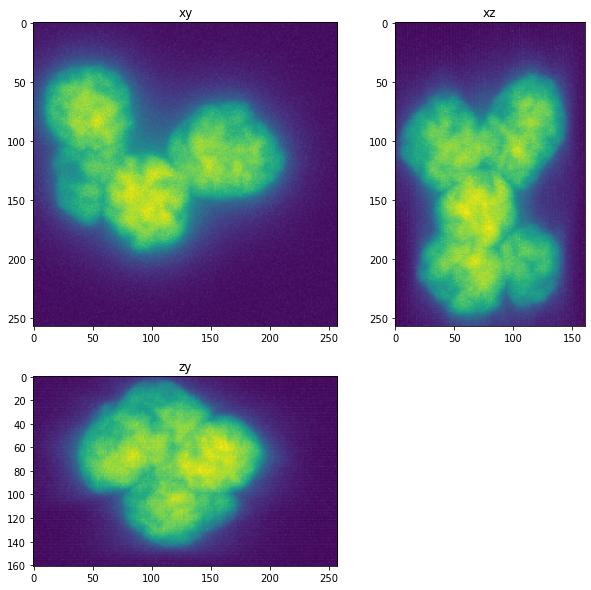

In [66]:
fig=show_xyz_max(im)

In [67]:
im_bgs = white_tophat(im, cube(60))

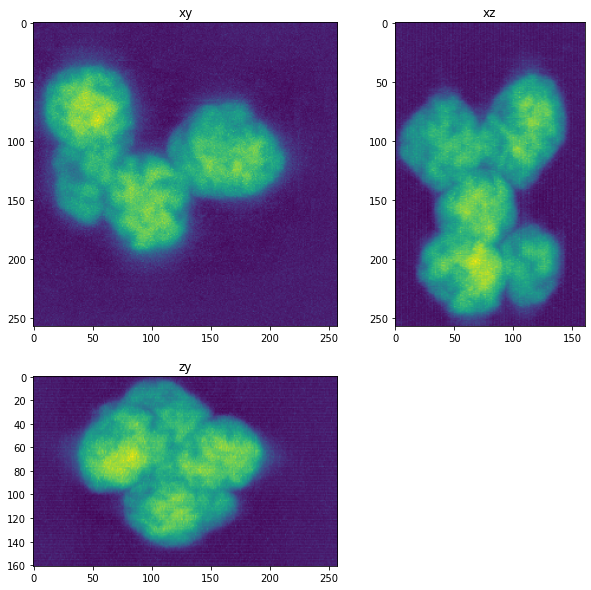

In [68]:
fig=show_xyz_max(im_bgs)

In [69]:
## blur original and detect maxima 
from skimage.filters import threshold_otsu
from skimage.filters import gaussian

blurred1 = gaussian(im, [10,10,10])
binary1 = blurred1>threshold_otsu(blurred1)

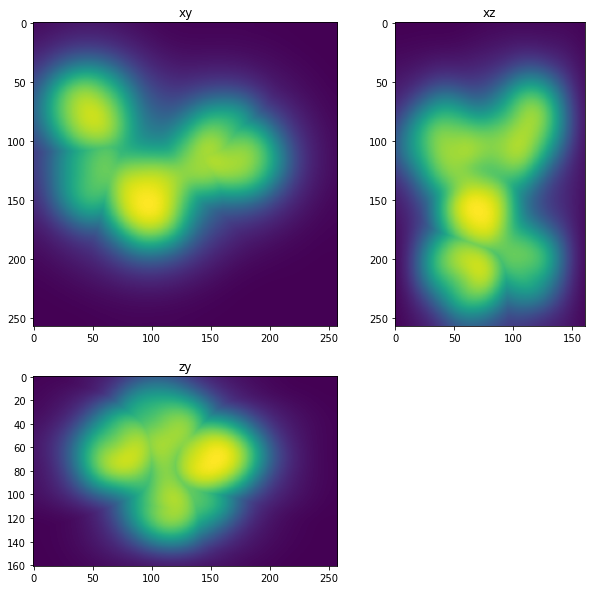

In [70]:
fig=show_xyz_max(blurred1)

In [73]:
help(peak_local_max)

Help on function peak_local_max in module skimage.feature.peak:

peak_local_max(image, min_distance=1, threshold_abs=None, threshold_rel=None, exclude_border=True, indices=True, num_peaks=inf, footprint=None, labels=None, num_peaks_per_label=inf, p_norm=inf)
    Find peaks in an image as coordinate list or boolean mask.
    
    Peaks are the local maxima in a region of `2 * min_distance + 1`
    (i.e. peaks are separated by at least `min_distance`).
    
    If both `threshold_abs` and `threshold_rel` are provided, the maximum
    of the two is chosen as the minimum intensity threshold of peaks.
    
    .. versionchanged:: 0.18
        Prior to version 0.18, peaks of the same height within a radius of
        `min_distance` were all returned, but this could cause unexpected
        behaviour. From 0.18 onwards, an arbitrary peak within the region is
        returned. See issue gh-2592.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    min_distance : int,

(5, 3)


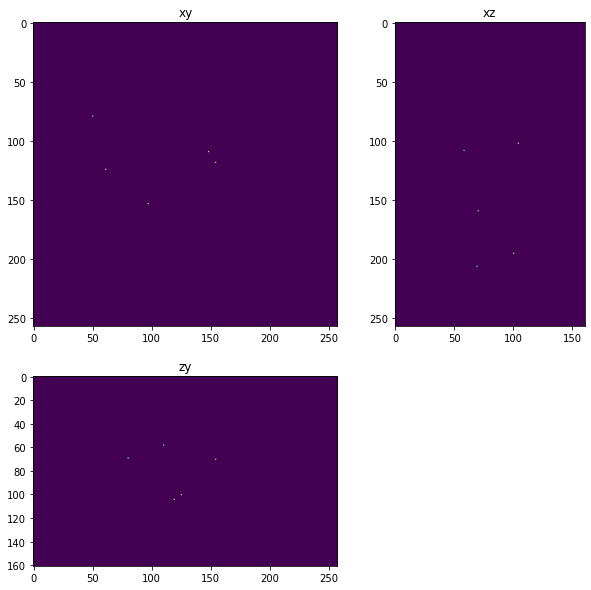

In [75]:
from skimage.feature import peak_local_max
import numpy as np
from scipy import ndimage as ndi

coords = peak_local_max(blurred1, 5)

print(coords.shape)

mask = np.zeros(blurred1.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

fig=show_xyz_max(mask)

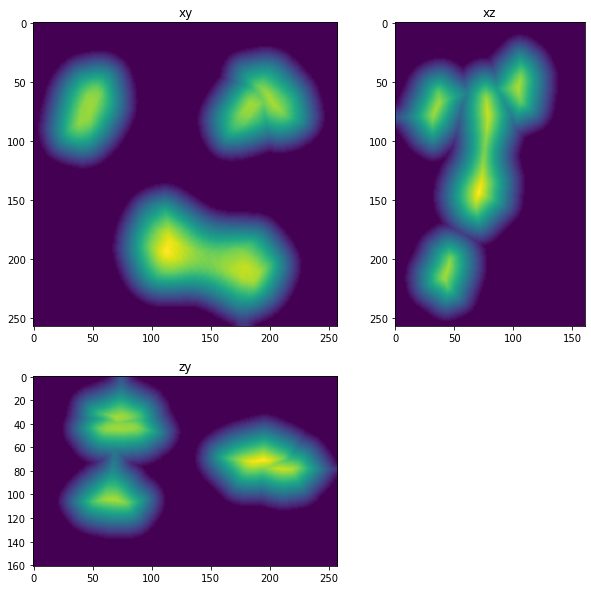

In [60]:
blurred2 = gaussian(im, [5,5,5])
binary2 = blurred2>threshold_otsu(blurred2)
distance = ndi.distance_transform_edt(binary2)
fig=show_xyz_max(distance)

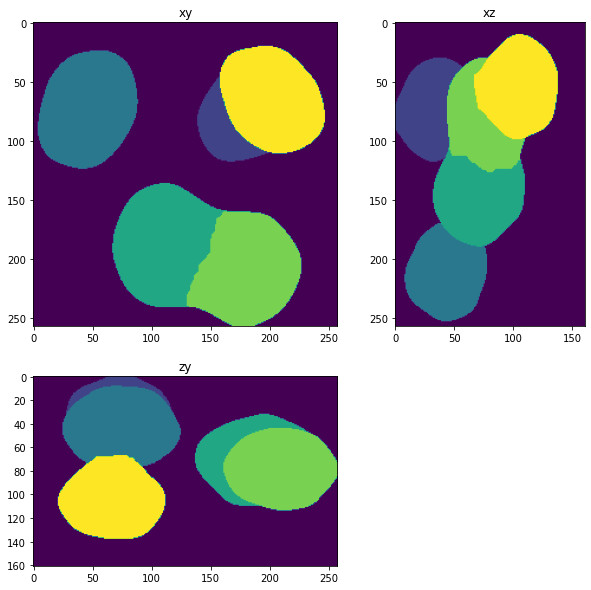

In [61]:
from skimage.segmentation import find_boundaries, watershed
labels = watershed(-distance, markers, mask=binary2, watershed_line=True)
fig=show_xyz_max(labels)